In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [120]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups (2).csv


In [121]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [122]:
data1 = data.drop('State',axis=1)
data1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [123]:
data1 = data1.rename({'R&D Spend':'R_D_Spend'},axis=1)
data1 = data1.rename({'Marketing Spend':'Marketing_Spend'},axis=1)
data1.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [124]:
data1.isna().sum()

R_D_Spend          0
Administration     0
Marketing_Spend    0
Profit             0
dtype: int64

In [125]:
data1.describe()

,R_D_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [126]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_D_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


#Correlation

In [127]:
data1.corr()

,R_D_Spend,Administration,Marketing_Spend,Profit
R_D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


The correlation between features R_D_Spend and Marketing_Spend is good.



#ScatterPlot

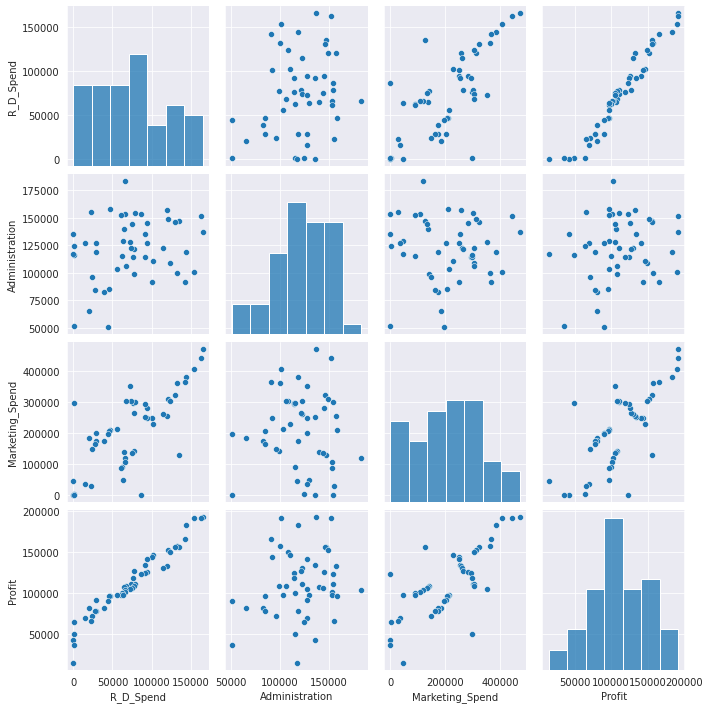

In [128]:
sns.set_style(style='darkgrid')
sns.pairplot(data=data1)

#Building a Model

In [129]:
model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=data1).fit()

In [130]:
model.params

Intercept          50122.192990
R_D_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [131]:
print(model.tvalues,"\n",model.pvalues)

Intercept           7.626218
R_D_Spend          17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
R_D_Spend          2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


All the pvalues are less than α=0.05 so the model will pass.

In [132]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        11:05:36   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Simple Linear Regression Model

Checking if correlation between R_D_Spend and Marketing_Spend affects the model accuracy.

In [133]:
Y = data1['Profit']
X = data1['R_D_Spend']
ml1 = sm.OLS(Y,X).fit()
print(ml1.tvalues,"\n",ml1.pvalues)

R_D_Spend    29.637316
dtype: float64 
 R_D_Spend    5.998452e-33
dtype: float64


The pvalue is less than α so the correlation between R_D_Spend and Profit is high.

In [134]:
Y = data1['Profit']
X = data1['Marketing_Spend']
ml2 = sm.OLS(Y,X).fit()
print(ml2.tvalues,"\n",ml2.pvalues)

Marketing_Spend    19.641765
dtype: float64 
 Marketing_Spend    7.099892e-25
dtype: float64


The pvalue is less than α so the correlation between Marketing_Spend and Profit is high.

In [135]:
Y = data1['Profit']
X = data1.iloc[:,[0,2]]
ml3 = sm.OLS(Y,X).fit()
print(ml3.tvalues,"\n",ml3.pvalues)

R_D_Spend          9.025574
Marketing_Spend    3.563420
dtype: float64 
 R_D_Spend          6.503196e-12
Marketing_Spend    8.395961e-04
dtype: float64


The pvalue is still less than α so both R_D_Spend and Marketing_Spend are important for the model and we might skip calculating VIF.

#Residual Analysis

##Checking normality of residuals with QQ-Plot

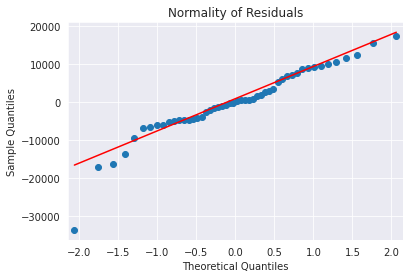

In [136]:
qqplot1 = sm.qqplot(model.resid,line='q')
plt.title('Normality of Residuals')
plt.show()

##Residual Plot for Homoscedasticity

In [137]:
def get_stan_val(val):
    return ((val-val.mean())/val.std())


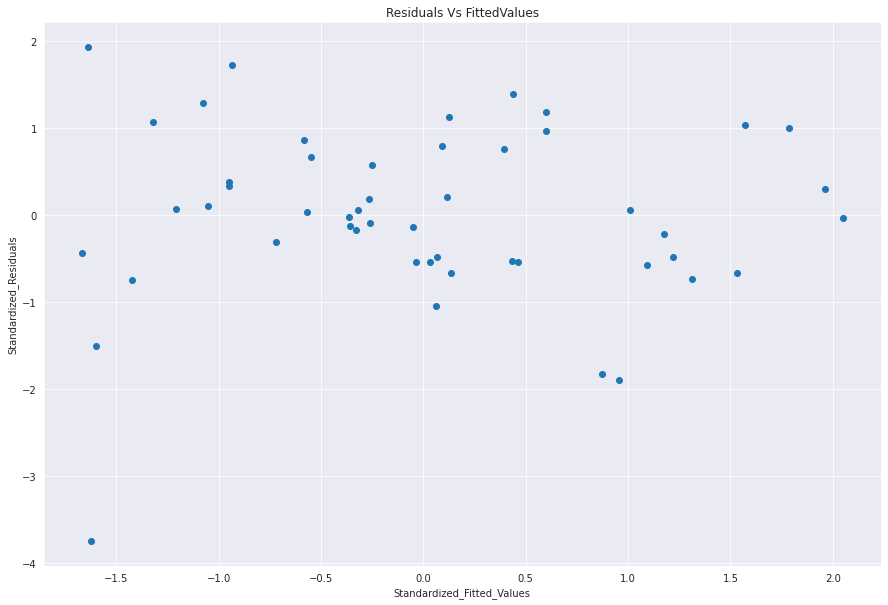

In [138]:
X=get_stan_val(model.fittedvalues)
Y=get_stan_val(model.resid)

plt.figure(figsize=(15,10))
plt.scatter(X,Y)
plt.xlabel('Standardized_Fitted_Values')
plt.ylabel('Standardized_Residuals')
plt.title("Residuals Vs FittedValues")
plt.show()

#Residual Vs Regressor

eval_env: 1


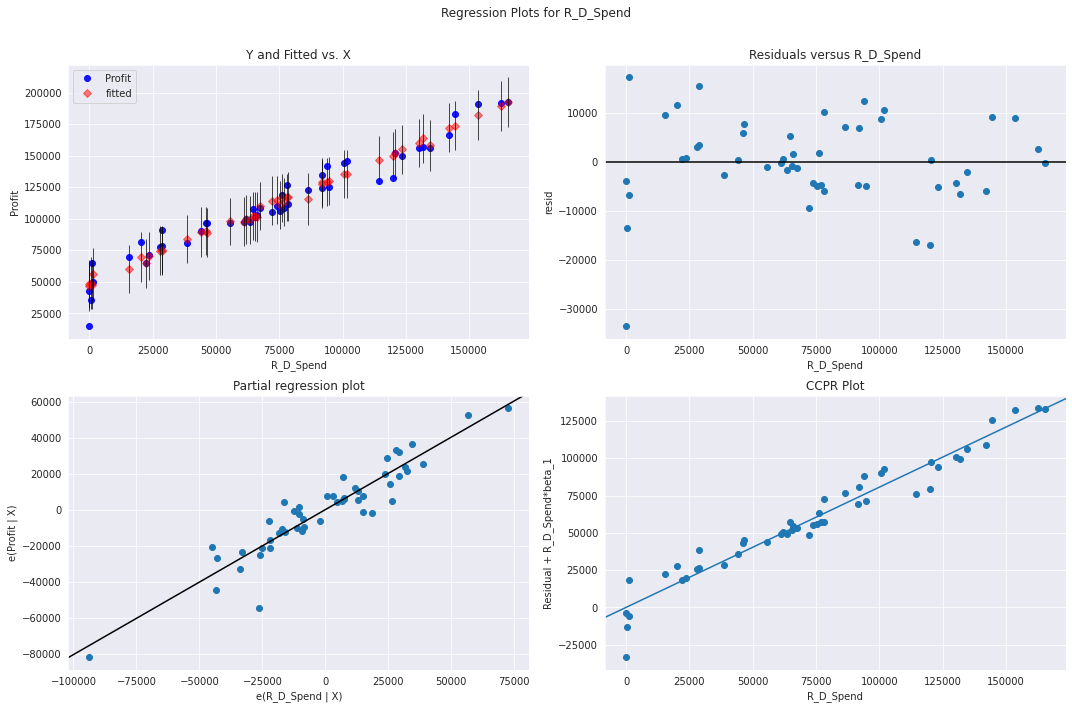

In [139]:
fig = plt.figure(figsize=(15,10)) 
fig = sm.graphics.plot_regress_exog(model,'R_D_Spend',fig=fig)
plt.show()

eval_env: 1


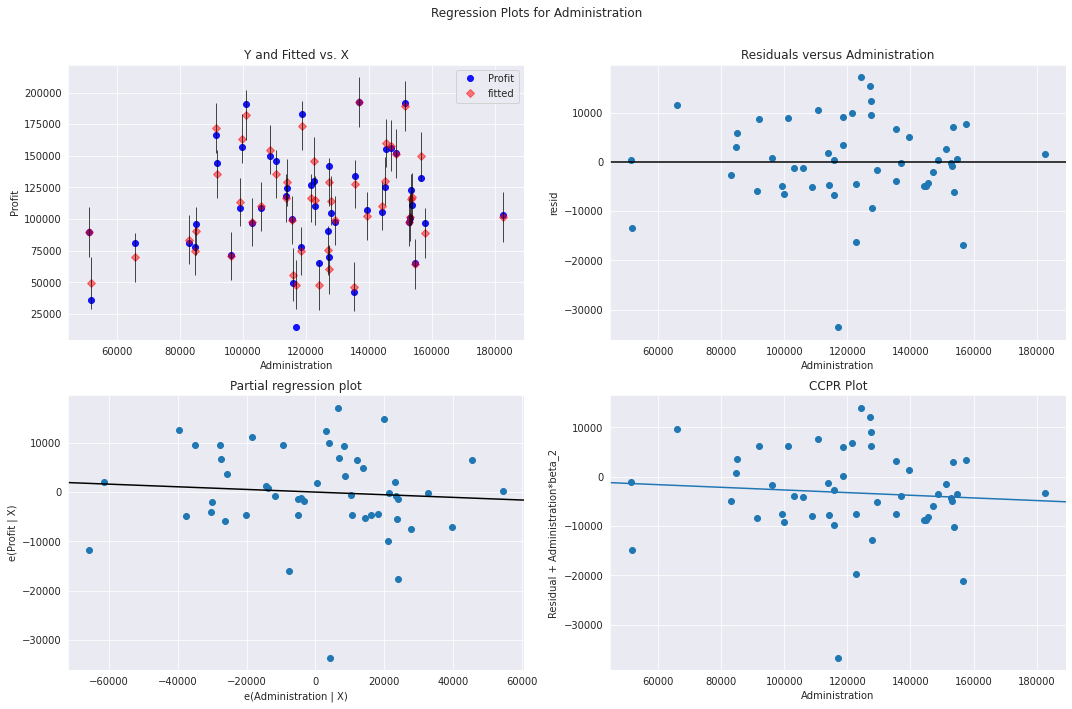

In [140]:
fig = plt.figure(figsize=(15,10)) 
fig = sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

eval_env: 1


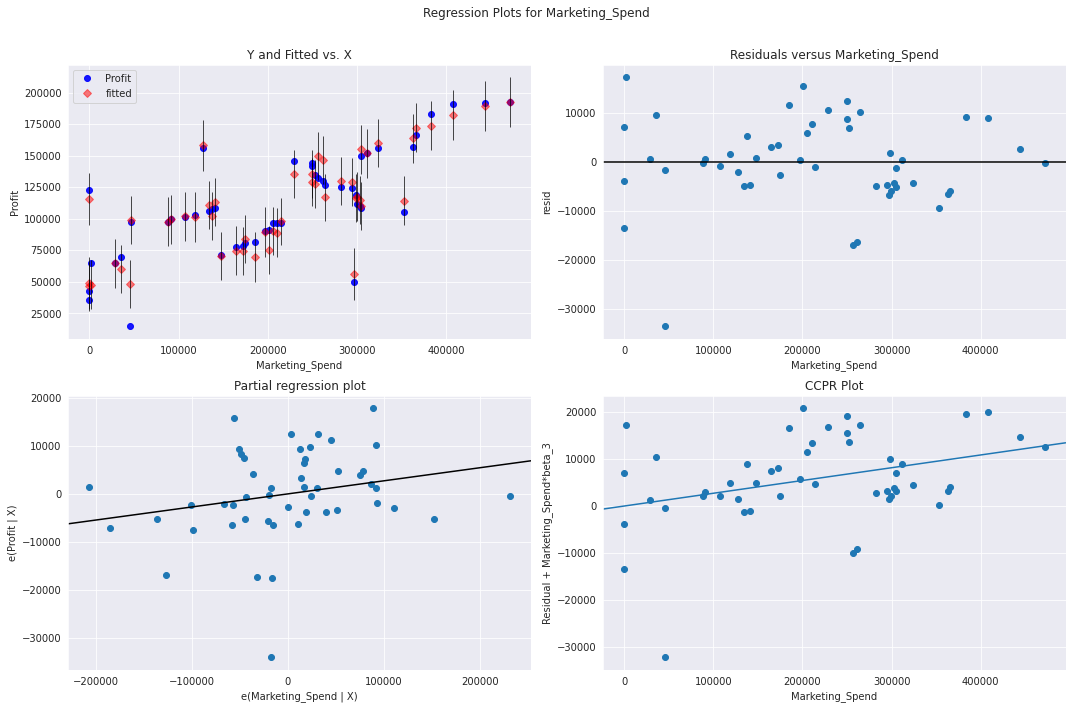

In [141]:
fig = plt.figure(figsize=(15,10)) 
fig = sm.graphics.plot_regress_exog(model,'Marketing_Spend',fig=fig)
plt.show()

#Model Deletion Diagnostics

##Cook's Distance

In [142]:
ml_influence = model.get_influence()
(c,_) = ml_influence.cooks_distance

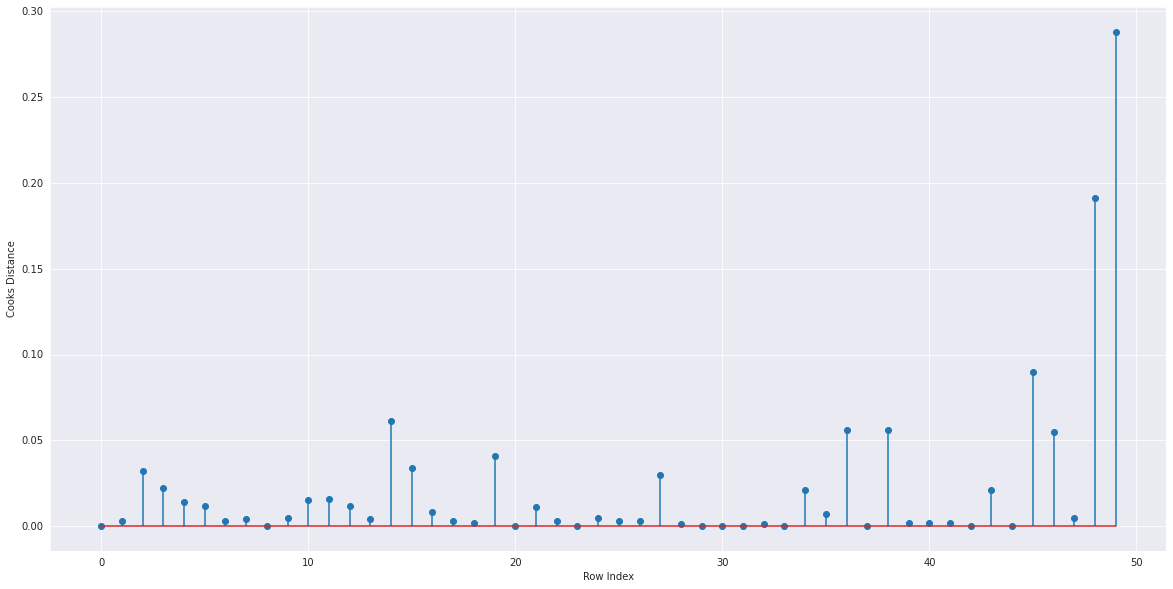

In [143]:
fig = plt.figure(figsize=(20,10))
plt.stem(np.arange(len(data1)) , np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [144]:
#index value of influencer where c is more than 0.5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

The value is less than 1 so no action is needed. So, we will finalize the model. 

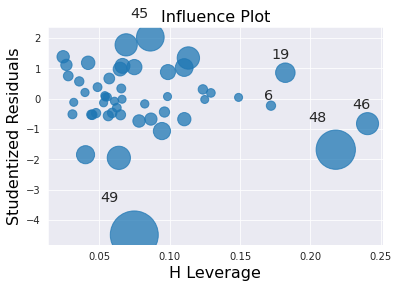

In [145]:
influence_plot(model)
plt.show()

In [146]:
(model.rsquared,model.aic)

(0.9507459940683246, 1058.7714985998055)

In [147]:
model.params

Intercept          50122.192990
R_D_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

So, in conclusion our model will be Y = 50122.192 + 0.805715*X1 - 0.026816*X2 + 0.027228*X3